<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Time_seriesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# adadpted from https://towardsdatascience.com/time-series-forecasting-a-practical-guide-to-exploratory-data-analysis-a101dc5f85b1

The hourly power consumption data comes from PJM’s website and are in megawatts (MW).

In [1]:
import pandas as pd

# Loading and preprocessing steps
df = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


<ipython-input-2-d46c26925dab>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'Date')

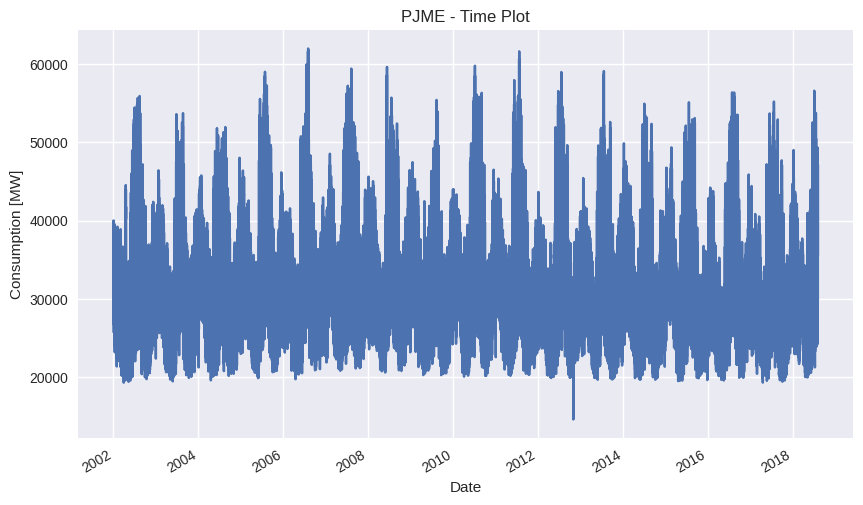

In [2]:
import matplotlib.pyplot as plt

# Set pyplot style
plt.style.use("seaborn")

# Plot
df['PJME_MW'].plot(title='PJME - Time Plot', figsize=(10,6))
plt.ylabel('Consumption [MW]')
plt.xlabel('Date')

In [3]:
# Defining required fields
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df = df.reset_index()
df['week'] = df['Datetime'].apply(lambda x:x.week)
df = df.set_index('Datetime')
df['hour'] = [x for x in df.index.hour]
df['day'] = [x for x in df.index.day_of_week]
df['day_str'] = [x.strftime('%a') for x in df.index]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]

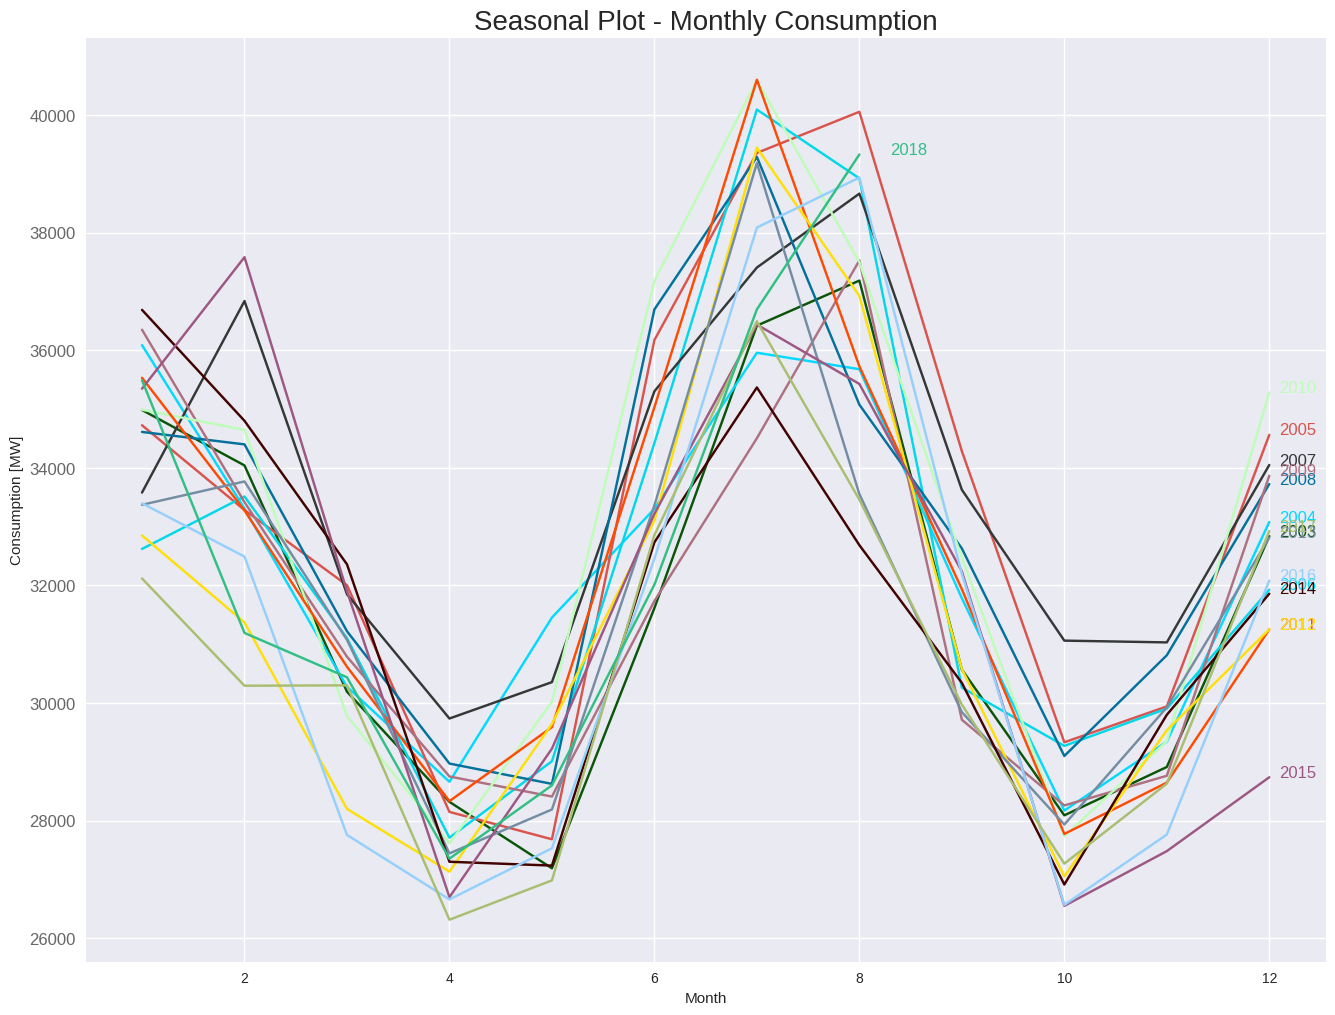

In [5]:
import numpy as np
import matplotlib as mpl

# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'year', 'PJME_MW']].dropna().groupby(['month', 'year']).mean()[['PJME_MW']].reset_index()
years = df_plot['year'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'PJME_MW', data=df_plot[df_plot['year'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.3, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.year==y, :].shape[0]+0.1, df_plot.loc[df_plot.year==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])

# Setting labels
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Monthly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()

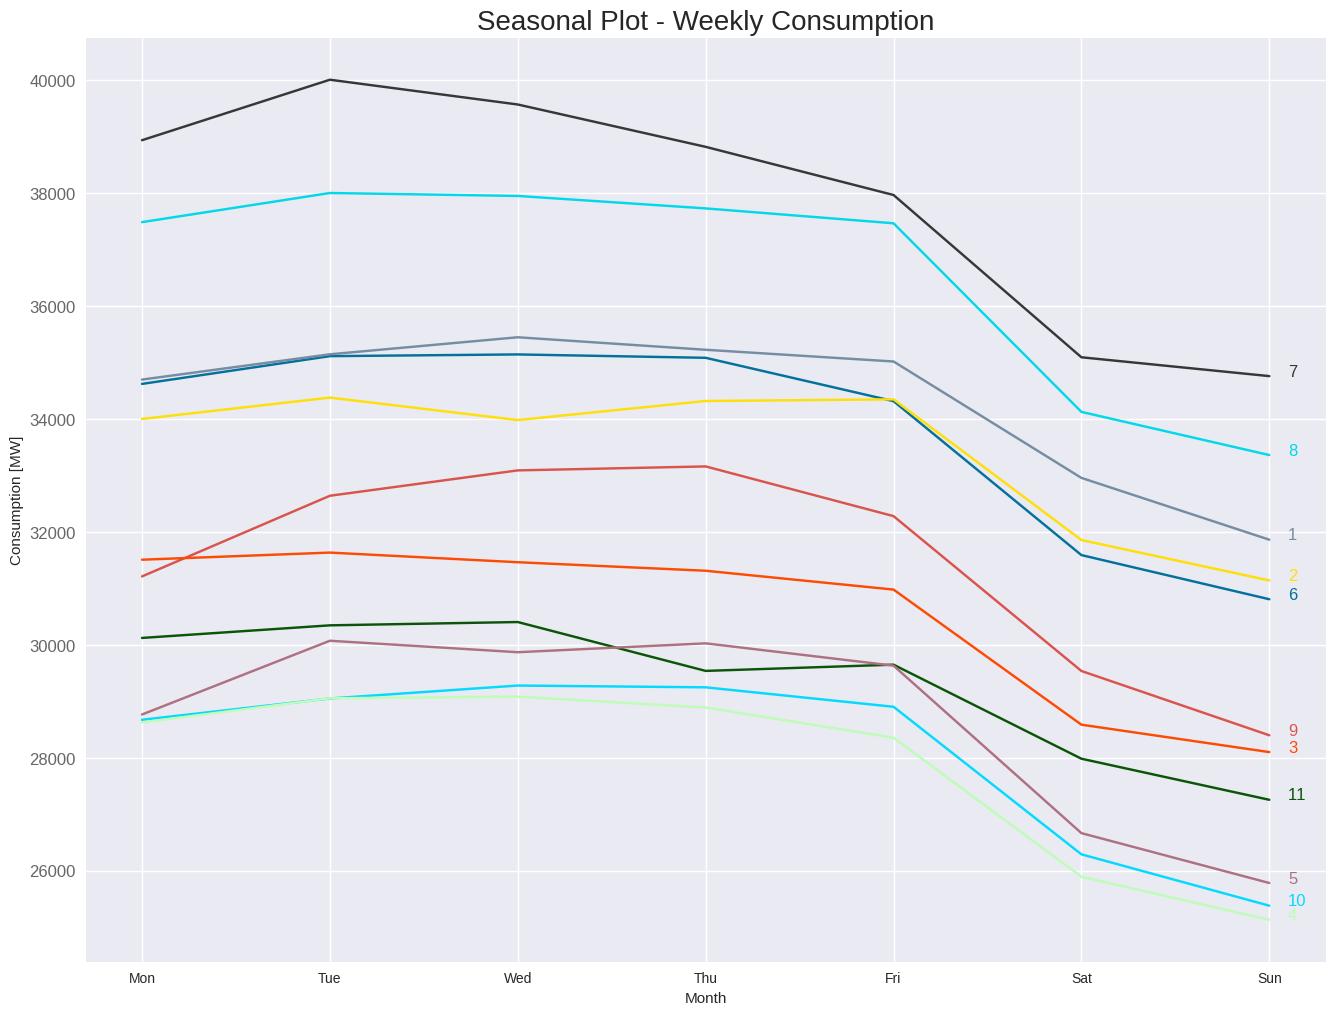

In [6]:
# Defining colors palette
np.random.seed(42)
df_plot = df[['month', 'day_str', 'PJME_MW', 'day']].dropna().groupby(['day_str', 'month', 'day']).mean()[['PJME_MW']].reset_index()
df_plot = df_plot.sort_values(by='day', ascending=True)

months = df_plot['month'].unique()
colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)

# Plot
plt.figure(figsize=(16,12))
for i, y in enumerate(months):
    if i > 0:
        plt.plot('day_str', 'PJME_MW', data=df_plot[df_plot['month'] == y], color=colors[i], label=y)
        if y == 2018:
            plt.text(df_plot.loc[df_plot.month==y, :].shape[0]-.9, df_plot.loc[df_plot.month==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])
        else:
            plt.text(df_plot.loc[df_plot.month==y, :].shape[0]-.9, df_plot.loc[df_plot.month==y, 'PJME_MW'][-1:].values[0], y, fontsize=12, color=colors[i])


# Setting Labels
plt.gca().set(ylabel= 'PJME_MW', xlabel = 'Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot - Weekly Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Month')
plt.show()

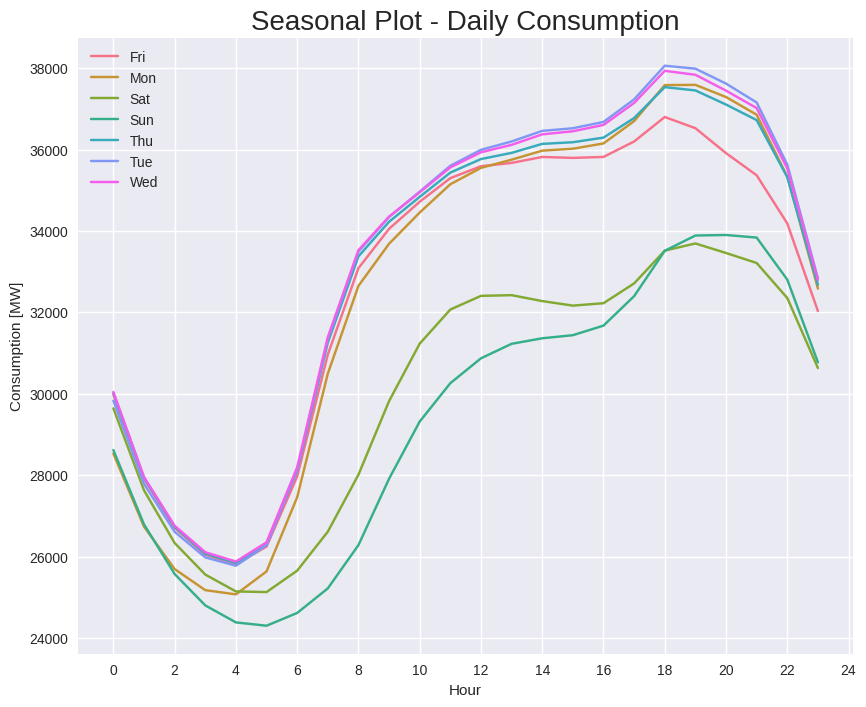

In [7]:
import seaborn as sns

# Defining the dataframe
df_plot = df[['hour', 'day_str', 'PJME_MW']].dropna().groupby(['hour', 'day_str']).mean()[['PJME_MW']].reset_index()

# Plot using Seaborn
plt.figure(figsize=(10,8))
sns.lineplot(data = df_plot, x='hour', y='PJME_MW', hue='day_str', legend=True)
plt.locator_params(axis='x', nbins=24)
plt.title("Seasonal Plot - Daily Consumption", fontsize=20)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')
plt.legend()

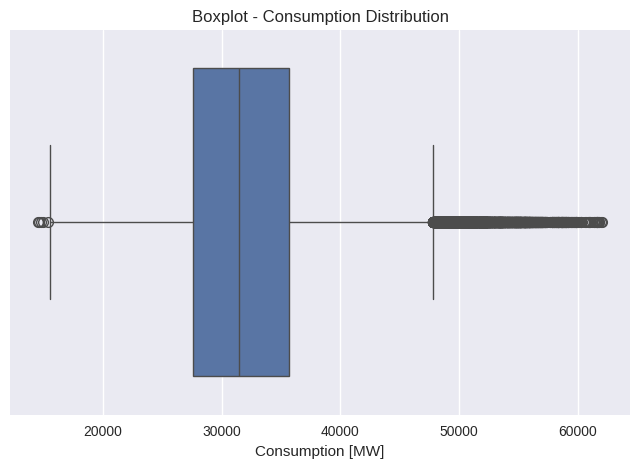

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='PJME_MW')
plt.xlabel('Consumption [MW]')
plt.title(f'Boxplot - Consumption Distribution');

Text(0.5, 0, 'Year Month')

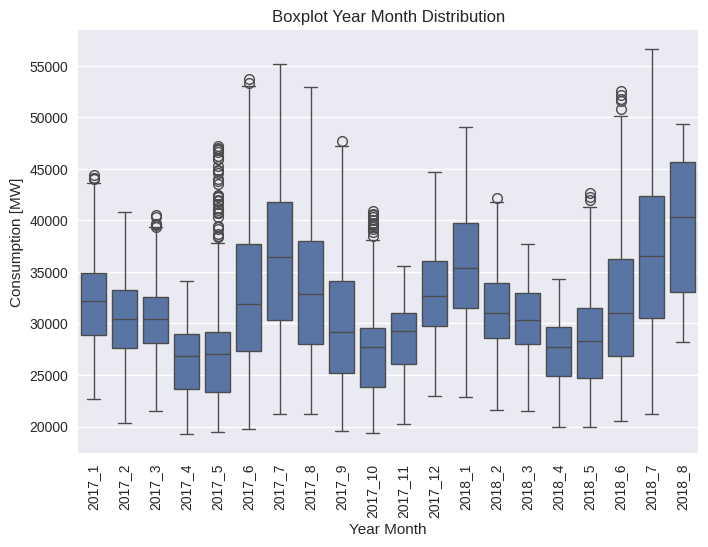

In [9]:
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df['year_month'] = [str(x.year) + '_' + str(x.month) for x in df.index]

df_plot = df[df['year'] >= 2017].reset_index().sort_values(by='Datetime').set_index('Datetime')
plt.title(f'Boxplot Year Month Distribution');
plt.xticks(rotation=90)
plt.xlabel('Year Month')
plt.ylabel('MW')

sns.boxplot(x='year_month', y='PJME_MW', data=df_plot)
plt.ylabel('Consumption [MW]')
plt.xlabel('Year Month')

Text(0.5, 0, 'Day of week')

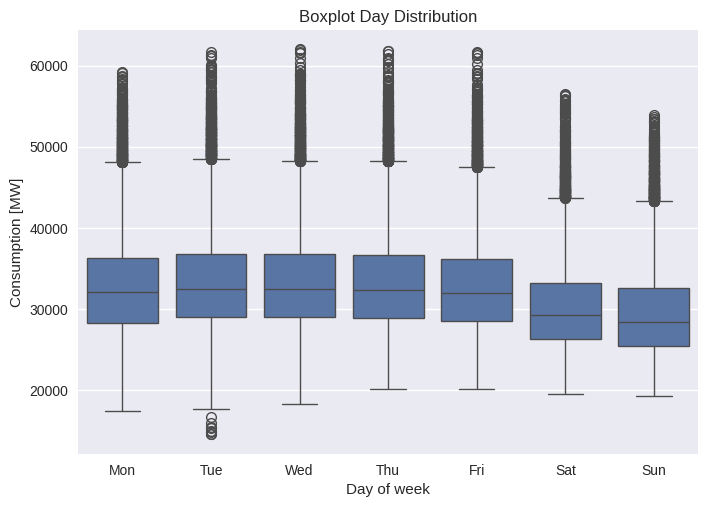

In [10]:
df_plot = df[['day_str', 'day', 'PJME_MW']].sort_values(by='day')
plt.title(f'Boxplot Day Distribution')
plt.xlabel('Day of week')
plt.ylabel('MW')
sns.boxplot(x='day_str', y='PJME_MW', data=df_plot)
plt.ylabel('Consumption [MW]')
plt.xlabel('Day of week')

Text(0.5, 0, 'Hour')

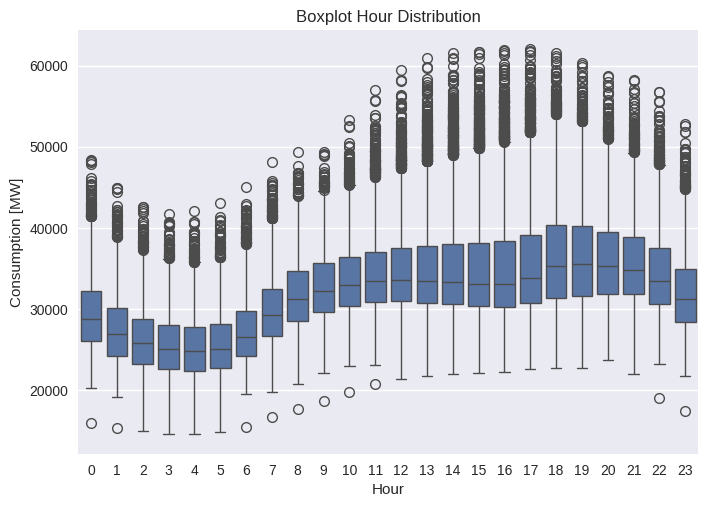

In [11]:
plt.title(f'Boxplot Hour Distribution');
plt.xlabel('Hour')
plt.ylabel('MW')
sns.boxplot(x='hour', y='PJME_MW', data=df)
plt.ylabel('Consumption [MW]')
plt.xlabel('Hour')

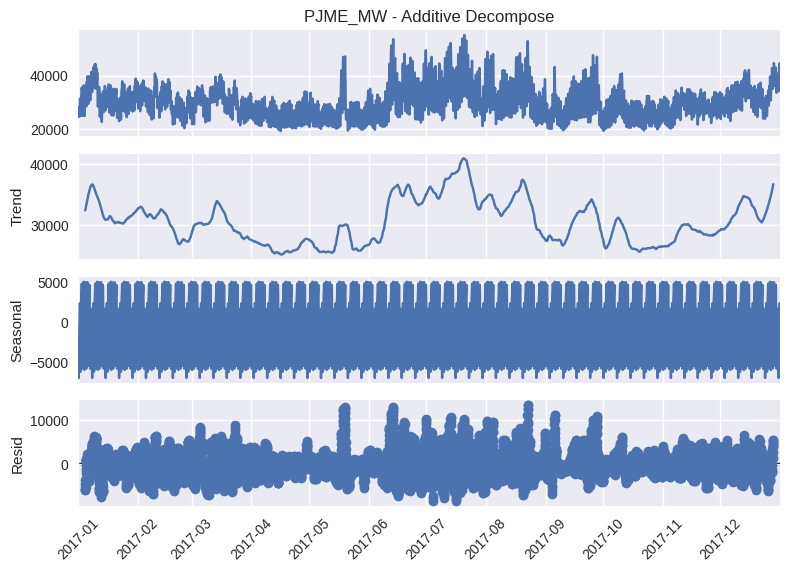

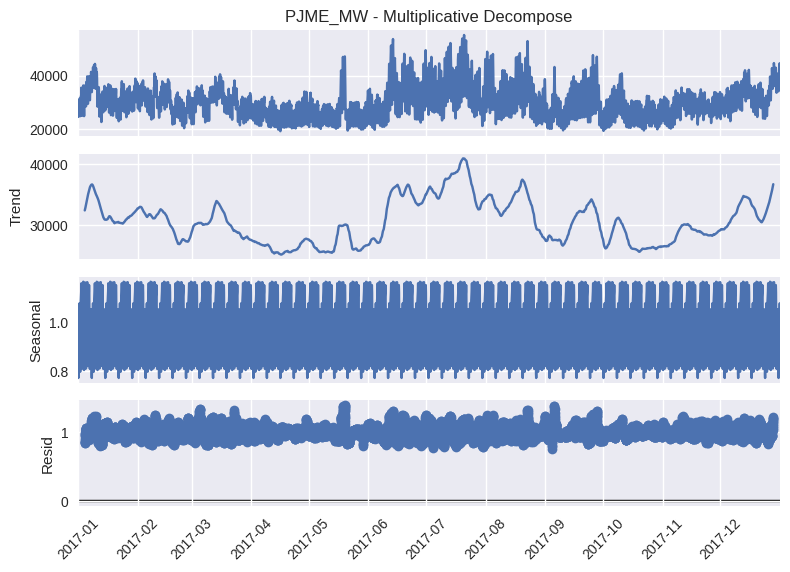

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_plot = df[df['year'] == 2017].reset_index()
df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')
df_plot = df_plot.set_index('Datetime')
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

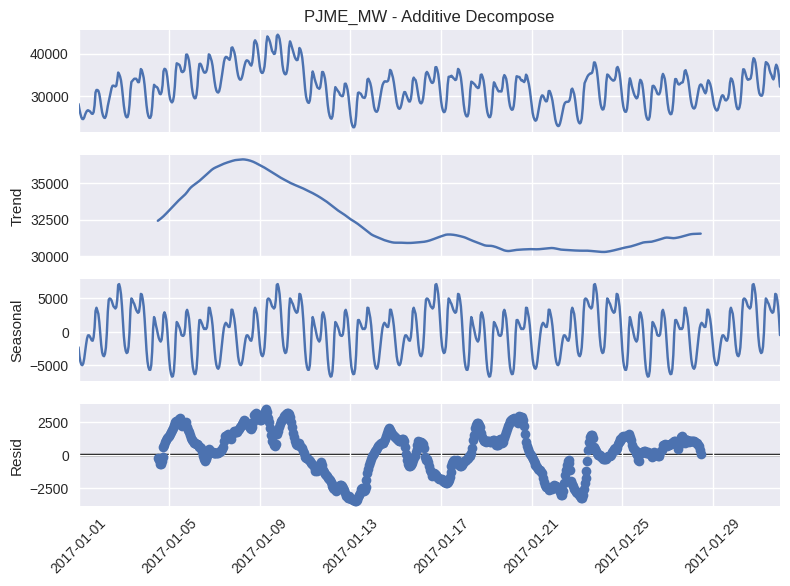

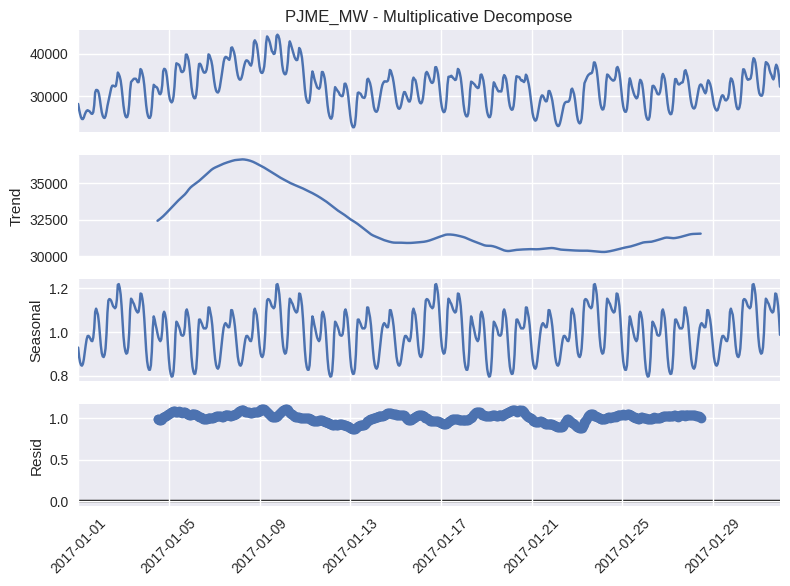

In [14]:
df_plot = df[(df['year'] == 2017)].reset_index()
df_plot = df_plot[df_plot['month'] == 1]
df_plot['PJME_MW - Multiplicative Decompose'] = df_plot['PJME_MW']
df_plot['PJME_MW - Additive Decompose'] = df_plot['PJME_MW']

df_plot = df_plot.drop_duplicates(subset=['Datetime']).sort_values(by='Datetime')
df_plot = df_plot.set_index('Datetime')

# Additive Decomposition
result_add = seasonal_decompose(df_plot['PJME_MW - Additive Decompose'], model='additive', period=24*7)

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_plot['PJME_MW - Multiplicative Decompose'], model='multiplicative', period=24*7)

# Plot
result_add.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
result_mul.plot().suptitle('', fontsize=22)
plt.xticks(rotation=45)
plt.show()

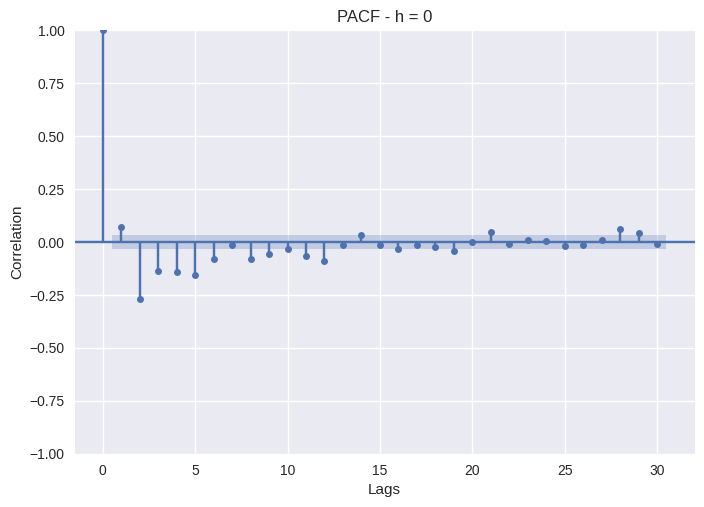

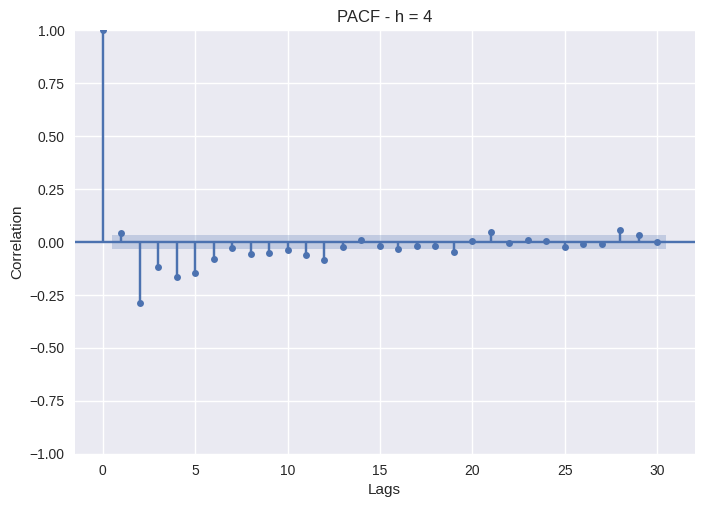

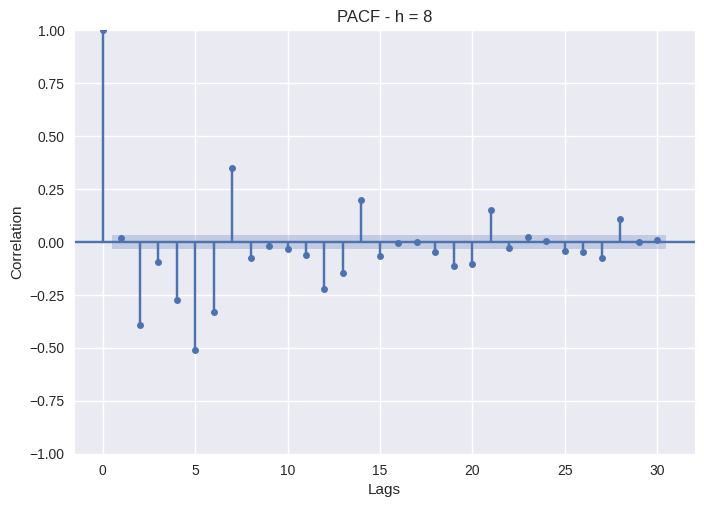

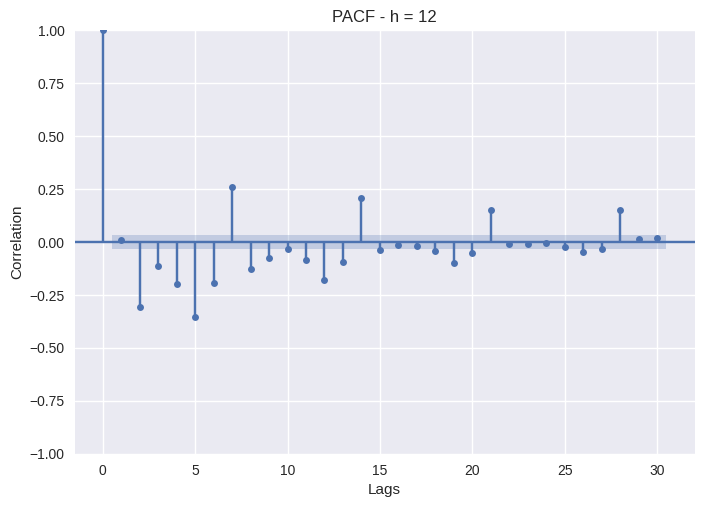

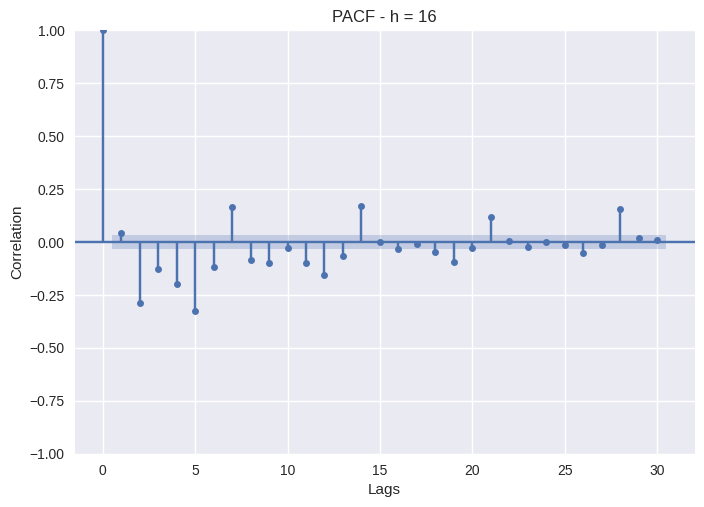

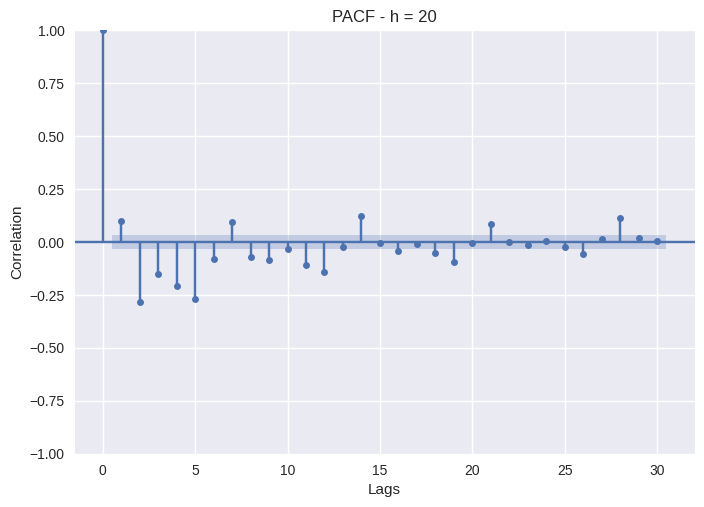

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

actual = df['PJME_MW']
hours = range(0, 24, 4)

for hour in hours:
    plot_pacf(actual[actual.index.hour == hour].diff().dropna(), lags=30, alpha=0.01)
    plt.title(f'PACF - h = {hour}')
    plt.ylabel('Correlation')
    plt.xlabel('Lags')
    plt.show()